<a href="https://colab.research.google.com/github/prudhvijiddigam/Computational-Methods/blob/main/In_class_exercise_08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The eighth in-class-exercise (20 points in total, 3/30/2021)**

The data for this exercise is from the dataset you created from assignment three. Please perform answer the following questions based on your data:

## (1) (10 points) Write a python program to extract the sentiment related terms from the corpus. You may use python package such as polyglot or external lexicon resources in the question. Rank the sentiment related terms by frequency.

In [4]:
# Write your code here

import pandas as pd
df = pd.read_csv('/content/sentimental_analysis1.csv')
df

,Titles,sentiment
0,text directly (rather than e.g. titles and abs...,positive
1,ABSTRACT: Language is way of communicating you...,positive
2,We report experiments on the use of standard n...,positive
3,"this paper, we will describe a simple rule-bas...",positive
4,This paper focuses on connectionist models in ...,positive
...,...,...
84,This paper presents a workbench built by Pribe...,positive
85,Abstract—Natural Language Processing (NLP) is ...,positive
86,"ABSTRACT: After twenty years of disfavor, a te...",positive
87,Text statistics are frequently used in stylome...,positive


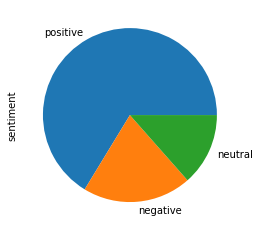

In [6]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().plot(kind='pie')

In [10]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from textblob import Word
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
stop = stopwords.words('english')


df['Titles'] = df['Titles'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Titles'] = df['Titles'].apply(lambda  x: " ".join(x for x in x.split() if x not in string.punctuation))
df['Titles'] = df['Titles'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Titles'] = df['Titles'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Titles,sentiment
0,"text directly (rather e.g. title abstracts), s...",positive
1,abstract: language way communicating word lang...,positive
2,report experiment use standard natural languag...,positive
3,"paper, describe simple rule-based approach aut...",positive
4,paper focus connectionist model natural langua...,positive


In [12]:
!pip install vaderSentiment
from nltk.util import ngrams 
import nltk, re, string, collections
from nltk.corpus import stopwords
import pandas as pd
import glob
import json
import csv
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import string
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 133kB 9.2MB/s 
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [17]:

from nltk.tokenize import word_tokenize
tokens = []
for words in df['Titles']:
  tokens.append(word_tokenize(words))
tokens[:2]

[['text',
  'directly',
  '(',
  'rather',
  'e.g',
  '.',
  'title',
  'abstracts',
  ')',
  ',',
  'suggests',
  'appropriate',
  'approach',
  'this',
  ',',
  'focus',
  'role',
  'natural',
  'language',
  'processing',
  '.',
  'paper',
  'also',
  'comment',
  'possible',
  'connection',
  'data',
  'knowledge',
  'retrieval',
  ',',
  'concludes',
  'emphasizing',
  'importance',
  'rigorous'],
 ['abstract',
  ':',
  'language',
  'way',
  'communicating',
  'word',
  'language',
  'help',
  'understanding',
  'world',
  ',',
  'we',
  'get',
  'better',
  'insight',
  'world',
  '.',
  'language',
  'help',
  'speaker',
  'vague',
  'precise',
  'like',
  '.',
  'nlp',
  'stand',
  'natural',
  'language',
  'processing..',
  'natural',
  'language',
  'language',
  'spoken']]

In [25]:
def sentiment_analysis(sentence):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    score=vs['compound']
    if score >= 0.5:
        return 'Positive'
    elif score <= -0.5:
        return 'Negative'
    else:
        return 'Neutral'

result=df.head(df.shape[0])
result['sentiment']=result['Titles'].apply(lambda x: sentiment_analysis(x))
positive = result.loc[result['sentiment'] == 'Positive']

print("Papers which are considered as positive sentiment:", pos['Titles'].size)
positive

Papers which are considered as positive sentiment: 41


,Titles,sentiment
1,abstract: language way communicating word lang...,Positive
2,report experiment use standard natural languag...,Positive
4,paper focus connectionist model natural langua...,Positive
6,paper (see [schank 86] theoretical discussion ...,Positive
8,paper briefly describes current implementation...,Positive
9,based literature resources. describe system ag...,Positive
12,abstract-- natural language processing theoret...,Positive
13,paper review process involved natural language...,Positive
14,article focus derivation large lexicon natural...,Positive
16,"sounds, text motion. technique developed deep ...",Positive


In [30]:
import itertools
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))
iterations[:5]

file = df.to_records(index=False)
file = list(file)
file[:5]

[('text directly (rather e.g. title abstracts), suggests appropriate approach this, focus role natural language processing. paper also comment possible connection data knowledge retrieval, concludes emphasizing importance rigorous', 'Neutral'),
 ('abstract: language way communicating word language help understanding world,we get better insight world. language help speaker vague precise like. nlp stand natural language processing.. natural language language spoken', 'Positive'),
 ('report experiment use standard natural language processing (nlp) tool analysis music lyrics. significant amount music audio lyrics. lyric encode important part semantics song, therefore analysis complement acoustic cultural', 'Positive'),
 ('paper, describe simple rule-based approach automated learning linguistic knowledge. approach shown number task capture information clearer direct fashion without compromise performance. present detailed case study learning method applied part speech tagging', 'Neutral'),


In [32]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in iterations:
        features['contains({})'.format(word)] = (word in document_words)
    return features
featuresets = [(document_features(d), c) for (d,c) in file]
train_set, test_set = featuresets[:80], featuresets[80:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.5555555555555556


## (2) (10 points) Compare the performance of the following tools in sentiment identification: TextBlob (https://textblob.readthedocs.io/en/dev/), VADER (https://github.com/cjhutto/vaderSentiment), TFIDF-based Support Vector Machine (SVM) (Split your data into training and testing data). Take your own annotation as the standard answers. 

Reference code: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [34]:
# Write your code here

df = pd.read_csv('/content/sentimental_analysis1.csv')
df






,Titles,sentiment
0,text directly (rather than e.g. titles and abs...,positive
1,ABSTRACT: Language is way of communicating you...,positive
2,We report experiments on the use of standard n...,positive
3,"this paper, we will describe a simple rule-bas...",positive
4,This paper focuses on connectionist models in ...,positive
...,...,...
84,This paper presents a workbench built by Pribe...,positive
85,Abstract—Natural Language Processing (NLP) is ...,positive
86,"ABSTRACT: After twenty years of disfavor, a te...",positive
87,Text statistics are frequently used in stylome...,positive


In [47]:
from textblob import TextBlob
polar=[]
for x in df['Titles']:
  blob = TextBlob(x)
  for sentence in blob.sentences:
    polar.append(sentence.sentiment.polarity)
neutral=0
positive=0
negative=0
for x in polar:
  if x==0.0:
    neutral+=1
  elif x>0:
    positive+=1
  else: negative+=1
print(" no of positive analysis ",pos)
print("no of negative analysis",neg)
print("no of neutral analysis",neutral)

 no of positive analysis  107
no of negative analysis 18
no of neutral analysis 99


In [53]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
def analysis_scores(sentence):
    result = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(result)))
for x in df['Titles'][:5]:
  analysis_scores(x)

text directly (rather than e.g. titles and abstracts), and suggests appropriate approaches to doing this, with a focus on the role of natural language processing. The paper also comments on possible connections with data and knowledge retrieval, and concludes by emphasizing the importance of rigorous  {'neg': 0.043, 'neu': 0.855, 'pos': 0.102, 'compound': 0.4404}
ABSTRACT: Language is way of communicating your words Language helps in understanding the world,we get a better insight of the world. Language helps speakers to be as vague or as precise as they like. NLP Stands for natural language processing.. Natural languages are those languages that are spoken  {'neg': 0.024, 'neu': 0.707, 'pos': 0.269, 'compound': 0.9217}
We report experiments on the use of standard natural language processing (NLP) tools for the analysis of music lyrics. A significant amount of music audio has lyrics. Lyrics encode an important part of the semantics of a song, therefore their analysis complements that o

In [54]:
train_set=df[:80]
test_set=df[80:]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 5,max_df = 0.8,sublinear_tf = True,use_idf = True)
train_vectors = vectorizer.fit_transform(train['Titles'])
test_vectors = vectorizer.transform(test['Titles'])

In [58]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, train['sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(test['sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['positive'])
##print('negative: ', report['negative'])
##print("neutral:", report['neutral'])

Training time: 0.005335s; Prediction time: 0.000562s
positive:  {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9}
